In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

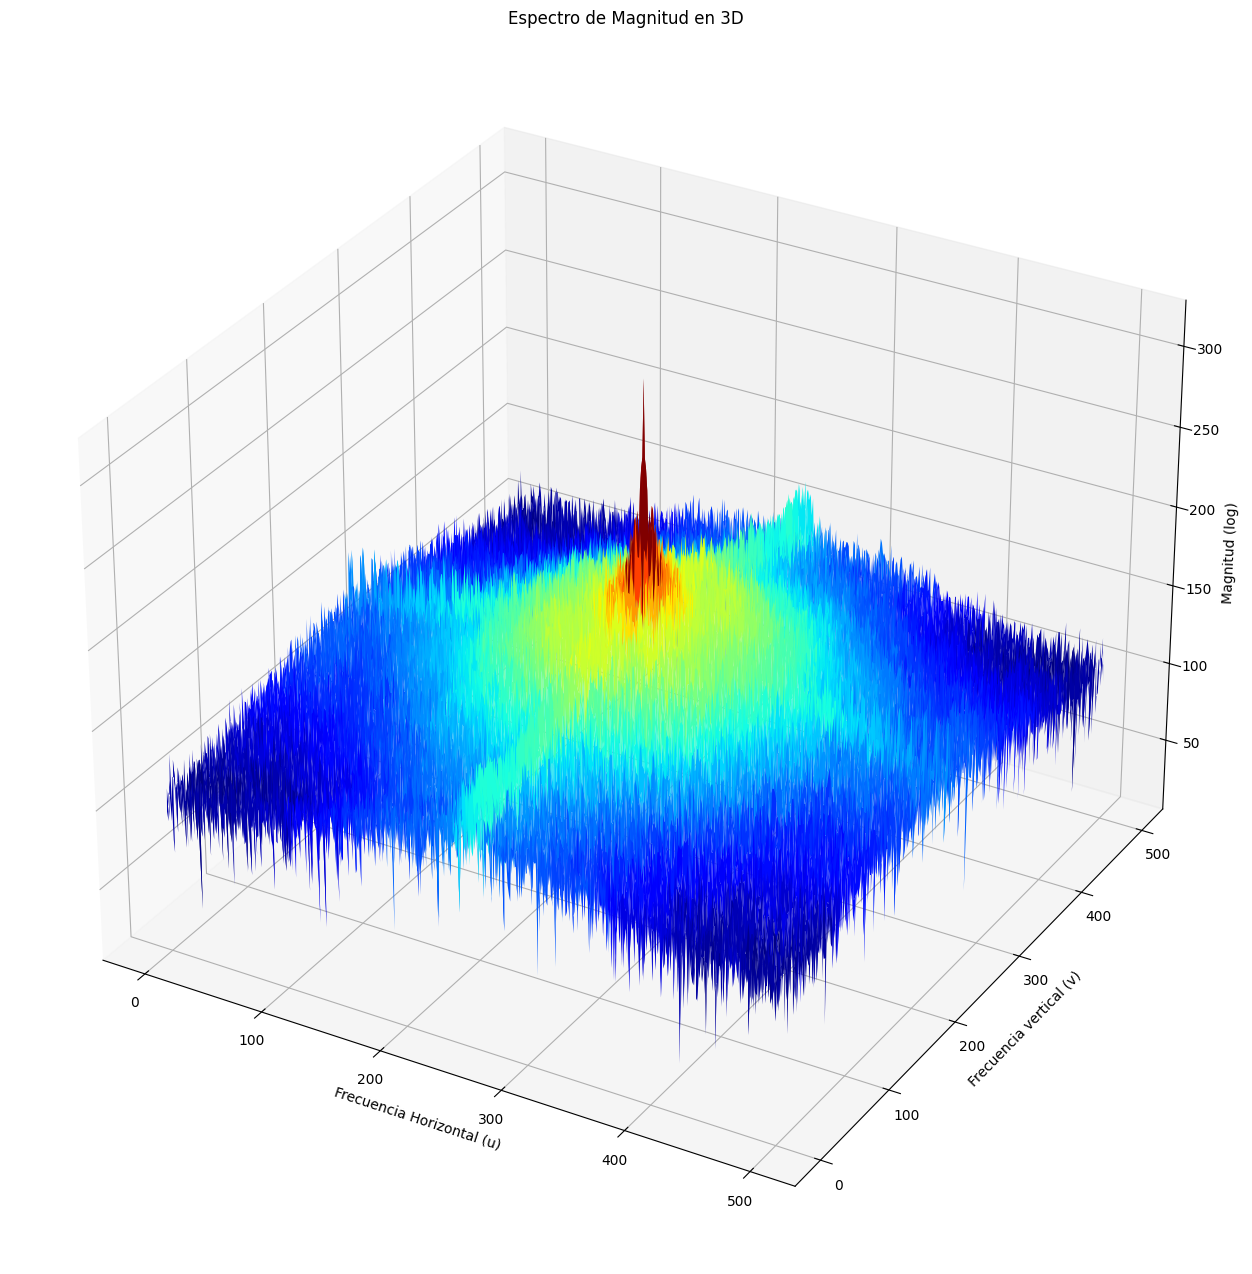

In [4]:
img = cv2.imread('darkPollen.jpg', cv2.IMREAD_GRAYSCALE)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Preparando los datos para la gráfica 3d
rows, cols = img.shape
u = np.arange(cols)
v = np.arange(rows)
U, V = np.meshgrid(u, v) 

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(U, V, magnitude_spectrum, cmap='jet')

ax.set_xlabel('Frecuencia Horizontal (u)')
ax.set_ylabel('Frecuencia vertical (v)')
ax.set_zlabel('Magnitud (log)')
ax.set_title('Espectro de Magnitud en 3D')

plt.show()
